In [75]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

#### Load the data

In [70]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

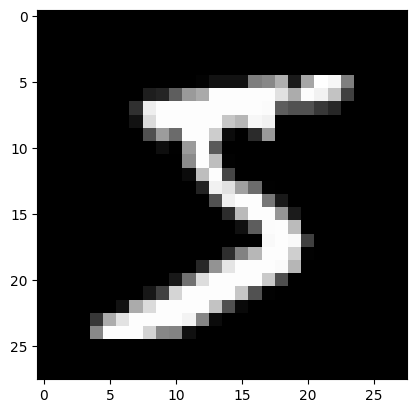

In [71]:
plt.imshow(x_train[0],cmap ='gray')

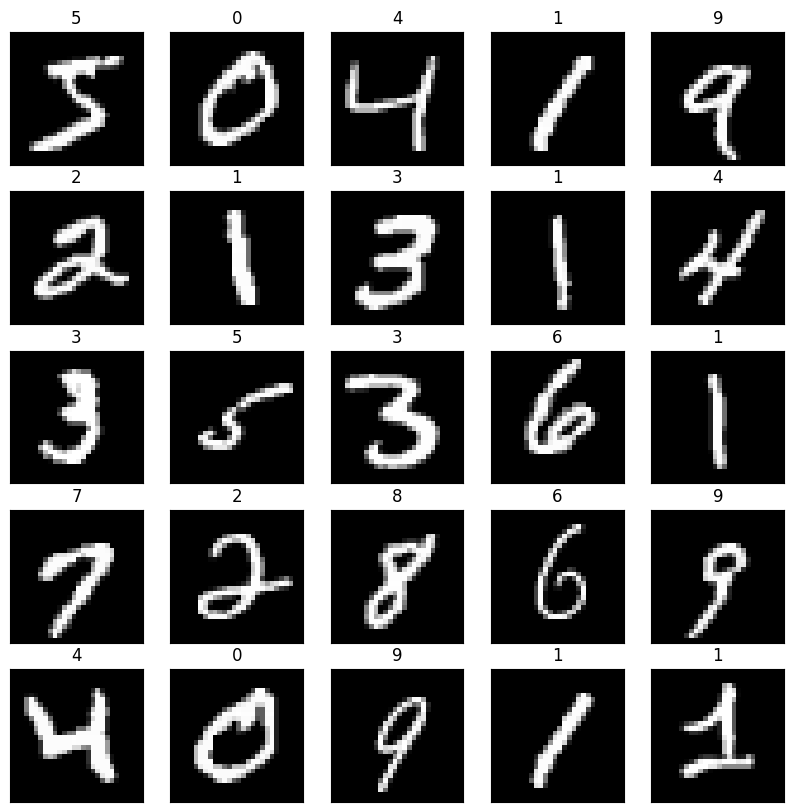

In [72]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])

plt.show()

#### Scale the data

In [5]:
x_train = x_train / 255
x_test = x_test / 255

Build the model

In [80]:
model = Sequential()

model.add(Conv2D(filters = 32, input_shape = (28,28,1), activation = 'relu', kernel_size = (3,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, activation = 'relu', kernel_size = (3,3)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10 , activation='softmax'))

Compile the model

In [85]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Train the model

In [86]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 24s 3ms/step - loss: 0.2573 - accuracy: 0.9467
Epoch 2/10
6000/6000 [==============================] - 21s 3ms/step - loss: 0.0841 - accuracy: 0.9751
Epoch 3/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0659 - accuracy: 0.9807
Epoch 4/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0549 - accuracy: 0.9846
Epoch 5/10
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0496 - accuracy: 0.9859
Epoch 6/10
6000/6000 [==============================] - 21s 3ms/step - loss: 0.0449 - accuracy: 0.9877
Epoch 7/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0438 - accuracy: 0.9880
Epoch 8/10
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0416 - accuracy: 0.9895
Epoch 9/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0390 - accuracy: 0.9902
Epoch 10/10
6000/6000 [==============================] - 21s 4ms/step - l

Evalate on test data

In [87]:
model.evaluate(x_test, y_test, batch_size = 1)

10000/10000 [==============================] - 24s 2ms/step - loss: 0.0945 - accuracy: 0.9853


[0.09454964101314545, 0.9853000044822693]

In [108]:
img = x_test[5885]

In [110]:
img.shape

(28, 28)

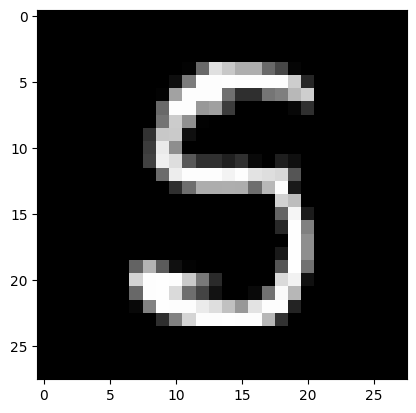

In [112]:
plt.imshow(img.reshape(28,28), cmap = 'gray')

In [113]:
def predict(image):
  # image = image / 255
  image = image.reshape(1, 28, 28)
  prediction = model.predict(image)
  return np.argmax(prediction)

In [114]:
img.shape

(28, 28)

In [115]:
predict(img)

1/1 [==============================] - 0s 74ms/step


5

In [116]:
img = x_test[600]
predict(img)

1/1 [==============================] - 0s 19ms/step


6

(784,)